# 1. Insertion Sort

In [4]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

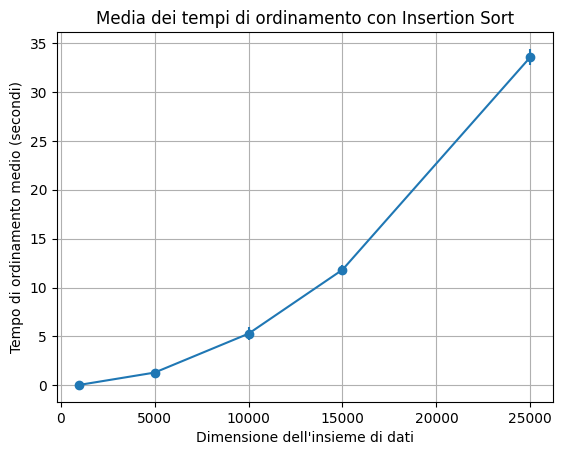

In [7]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# Implementazione di Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Funzione per eseguire il test di Insertion Sort
def test_insertion_sort(arr):
    start_time = timer()
    insertion_sort(arr)
    end_time = timer()
    return end_time - start_time

if __name__ == "__main__":
    sizes = [1000, 5000, 10000, 15000, 25000]
    insertion_sort_times = []

    for size in sizes:
        size_times = []

        for _ in range(20):
            data = [random.randint(1, 1000) for _ in range(size)]
            elapsed_time = test_insertion_sort(data)
            size_times.append(elapsed_time)

        # Calcolo della media e della deviazione standard dei tempi di esecuzione per questa dimensione
        mean = np.mean(size_times)
        std = np.std(size_times)

        insertion_sort_times.append((mean, std))

    # Estrai i valori medi e le deviazioni standard per i grafici
    medie = [media for media, _ in insertion_sort_times]
    deviazioni = [deviazione for _, deviazione in insertion_sort_times]

    # Creazione del grafico di Insertion Sort con ± deviazione standard
    plt.errorbar(sizes, medie, yerr=deviazioni, fmt='o-')
    plt.xlabel('Dimensione dell\'insieme di dati')
    plt.ylabel('Tempo di ordinamento medio (secondi)')
    plt.title('Media dei tempi di ordinamento con Insertion Sort')
    plt.grid(True)
    plt.show()

# 2. Merge Sort


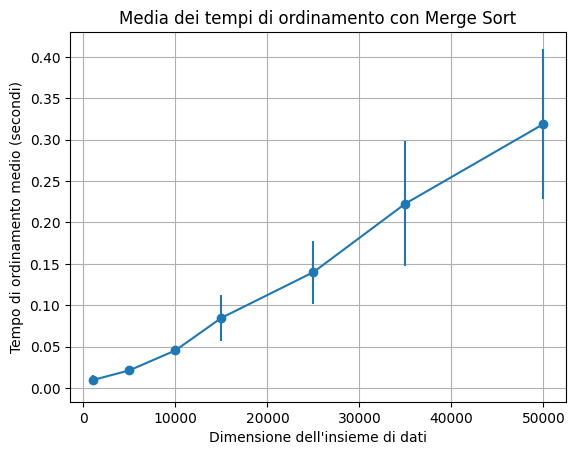

In [8]:
# Implementazione di Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

# Funzione per eseguire il test di Merge Sort
def test_merge_sort(arr):
    start_time = timer()
    merge_sort(arr)
    end_time = timer()
    return end_time - start_time

if __name__ == "__main__":
    sizes = [1000, 5000, 10000, 15000, 25000, 35000, 50000]
    merge_sort_times = []

    for size in sizes:
        size_times = []

        for _ in range(100):
            data = [random.randint(1, 1000) for _ in range(size)]
            elapsed_time = test_merge_sort(data)
            size_times.append(elapsed_time)

        # Calcolo della media e della deviazione standard dei tempi di esecuzione per questa dimensione
        mean = np.mean(size_times)
        std = np.std(size_times)

        merge_sort_times.append((mean, std))

    # Estrai i valori medi e le deviazioni standard per i grafici
    medie = [media for media, _ in merge_sort_times]
    deviazioni = [deviazione for _, deviazione in merge_sort_times]

    # Creazione del grafico di Merge Sort con ± deviazione standard
    plt.errorbar(sizes, medie, yerr=deviazioni, fmt='o-')
    plt.xlabel('Dimensione dell\'insieme di dati')
    plt.ylabel('Tempo di ordinamento medio (secondi)')
    plt.title('Media dei tempi di ordinamento con Merge Sort')
    plt.grid(True)
    plt.show()